<a href="https://colab.research.google.com/github/FrankFoglia91/Python-Projects/blob/main/Predict_yearly_amount_spent_in_e_commerce_by_consumer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Francesco Fogliamanzillo

# Improve and predict yearly amount spent per consumer in e-commerce business
___


### Business goal
***
The business goal is to help an **e-commerce company** that sells clothing in fisical stores and online (through its e-commerce site and its mobile app) to decide whether to **focus their efforts** to increment the yearly total spent per consumer.
    
In the first part, for advise the company to achieve this goal, we will use a **Linear Regression** to model the yearly amount spent by a consumer with the available variables.
In the second part, we will use a **machine learning** approach to **predict** the yearly amount spent by a consumer. We will choose a model that guarantees the better predictive perfomance in terms of yearly amount spent per consumer.

In [2]:
## libraries
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
#matplotlib.use('TkAgg')
import seaborn as sns
## for statistical tests
import scipy
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols,rlm
##for machine learning
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2

from google.colab import drive
drive.mount("/content/gdrive")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/gdrive


In [3]:

df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Ecommerce Customers.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In this dataset we have 8 variables wich 3 of these are **nominal variables** (*Email, Address, Avatar*) and the others 5 are **continous variables** (*Avg. Session Length, Time on App, Time on Website, Length of Membership, Yearly Amount Spent*). 

### Explanatory data analysis and preprocessing
___

First of all, we need to verify if data present missing values and if the variables are imported in the correct type.
There aren't missing values as shown in the following table.

In [4]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

<p>After we have verified that the data is cleaned and imported correctly,
we need to verify if preprocessing steps are necessary.<p>
Pandas df.describe() method is used to view some basic statistical details like percentile, mean, std etc. for continous variables of a data frame.
Instead, for nominal variables describe() method returns count, unique values, top values and frequency.

In [5]:
df.describe(include =['object'])

,Email,Address,Avatar
count,500,500,500
unique,500,500,138
top,jstark@anderson.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",CadetBlue
freq,1,1,7


In [6]:
df.describe(include =['float'])

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


<p> The precedent table shows that data don't need preprocessing steps: the variables haven't a high variance (std). The only feature that present high variance is Yearly Amount Spent (used like dependent variable in statistical modeling); for this variable is not chosen any transformation for guarantee an easier interpretation of results of the linear regression.<p>
The next step is to verify the distribution of the features in the dataset.

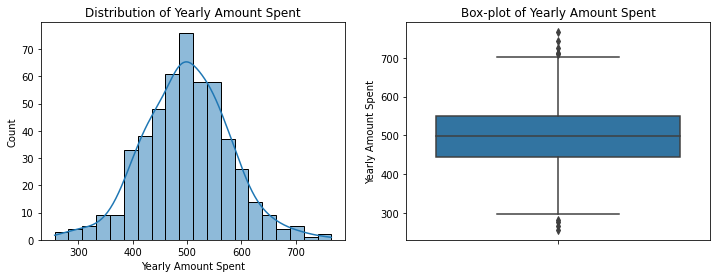

Median of Yearly Amount Spent: 498.88787546911493
Mean of Yearly Amount Spent: 499.3140382585909


In [7]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 4)
#plt.subplot(1,2,1)
ax[0].title.set_text('Distribution of Yearly Amount Spent')
sns.histplot(df['Yearly Amount Spent'],kde=True, ax=ax[0])

#plt.subplot(1,2,2)
ax[1].title.set_text('Box-plot of Yearly Amount Spent')
sns.boxplot(y=df['Yearly Amount Spent'], ax=ax[1])
plt.show()

print('Median of Yearly Amount Spent:',np.median(df['Yearly Amount Spent']))
print('Mean of Yearly Amount Spent:',np.mean(df['Yearly Amount Spent']))

The variable Yearly Amount Spent is normally distribuited as shown in the histogram with kernel density esitmation (KDE); the mean and the median of Yearly Amount Spent are approximately the same ($\approx 499$).
Whereas the box-plot shows some values out of the Inter Quartile Range (IQR) that we can define as _outliers_.

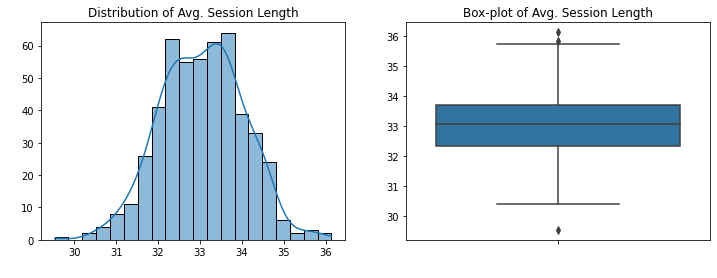

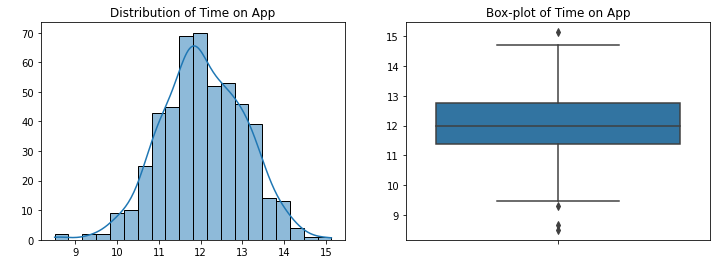

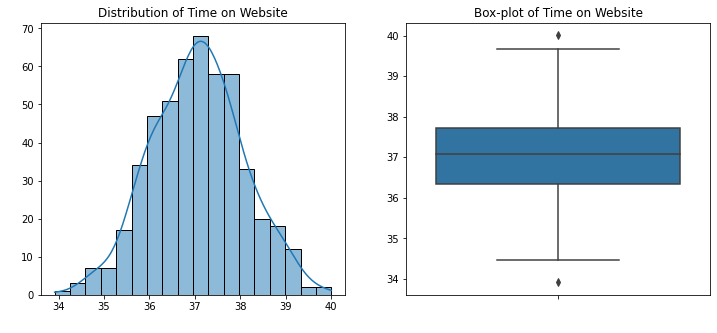

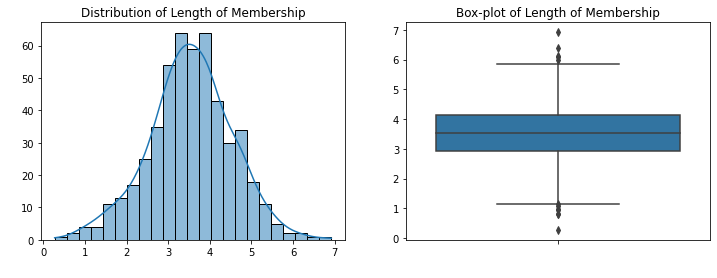

In [8]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 4)
ax[0].set(ylabel=' ',xlabel=' ',title='Distribution of Avg. Session Length')
sns.histplot(df['Avg. Session Length'],kde=True, ax=ax[0])
sns.boxplot(y=df['Avg. Session Length'], ax=ax[1])
ax[1].set(ylabel=' ',xlabel=' ',title='Box-plot of Avg. Session Length')
plt.show()

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 4)
ax[0].set(ylabel=' ',xlabel=' ',title='Distribution of Time on App')
sns.histplot(df['Time on App'],kde=True, ax=ax[0])
sns.boxplot(y=df['Time on App'], ax=ax[1])
ax[1].set(ylabel=' ',xlabel=' ',title='Box-plot of Time on App')
plt.show()

#for ax in fig.get_axes():
 #   ax.label_outer()

plt.show()

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 5)
ax[0].set(ylabel=' ',xlabel=' ',title='Distribution of Time on Website')
sns.histplot(df['Time on Website'],kde=True, ax=ax[0])
sns.boxplot(y=df['Time on Website'], ax=ax[1])
ax[1].set(ylabel=' ',xlabel=' ',title='Box-plot of Time on Website')
plt.show()

#for ax in fig.get_axes():
 #   ax.label_outer()

plt.show()


fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 4)
ax[0].set(ylabel=' ',xlabel=' ',title='Distribution of Length of Membership')
sns.histplot(df['Length of Membership'],kde=True, ax=ax[0])
sns.boxplot(y=df['Length of Membership'], ax=ax[1])
ax[1].set(ylabel=' ',xlabel=' ',title='Box-plot of Length of Membership')
plt.show()

#for ax in fig.get_axes():
 #   ax.label_outer()

plt.show()

Precedent plots show that all features are close to normal distribuitions.

### Feature Selection
___
Feature Selection is the process of selecting the most significant features from a given dataset. In many of the cases, Feature Selection can enhance the performance of a model.
First of all we exclude from Linear regression the nominal variables as Email, Avatar and Address that can't add information about the linear relation between dependent variable and independent variables.

The filter method used for selecting features is based on the Pearson correlation coefficient.
Each feature is filtered on the basis of correlation scores with the outcome variable and then we will build the model.

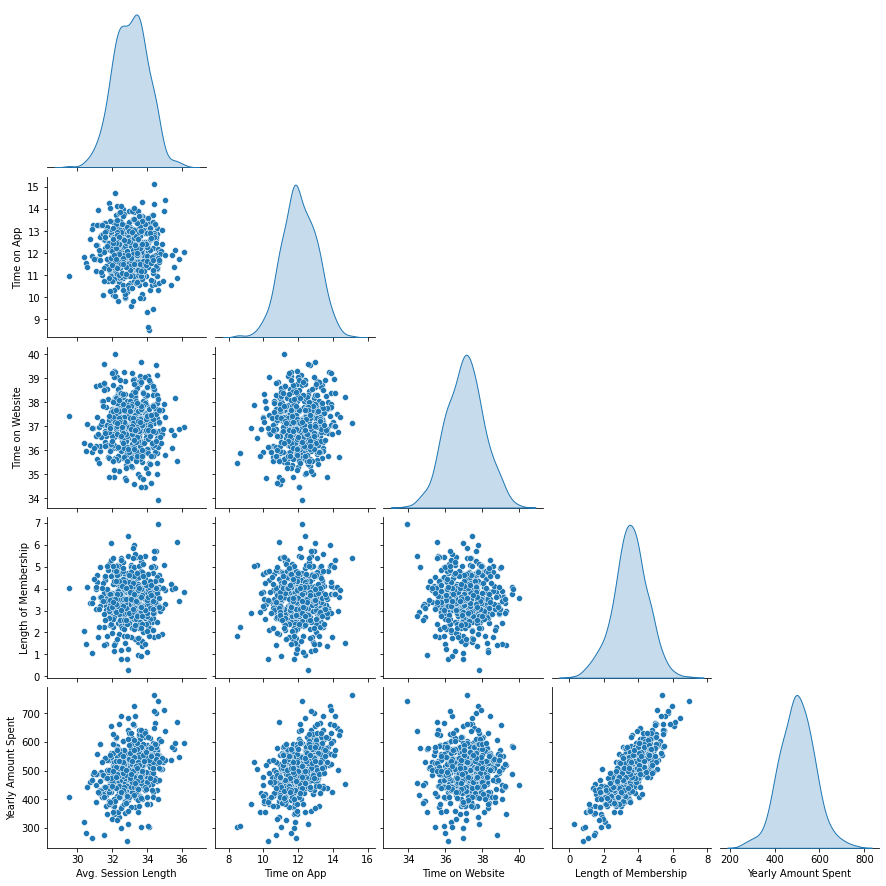

In [9]:
#feature selection with correlations
#%matplotlib inline
#plt.figure(figsize=(20,15))
sns.pairplot(df,  height=2.5, corner=True, diag_kind= 'kde')

The pairplot shows and compares the relationships between the variables of the dataset.
Then we can see the Pearson correlation heatmap that shows the correlation of the variables with the output variable _Yearly Amount Spent_.

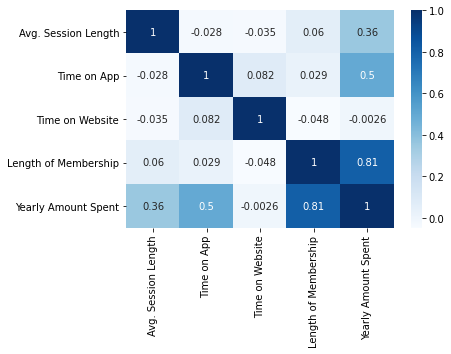

In [10]:
sns.heatmap(df.corr(),cmap = 'Blues', annot=True)

We will only select the features which have correlation coefficient above the _threshold_ ($\rho\geq\lvert0.3\rvert$) with the output variable.

In particular, _Length of Membership_ is highly correlated ($\approx0.81$) with the output variable; _Avg. Session Length_ and  _Time on App_ are moderately correlated with _Yearly Amount Spent_.
It's evident that _Time on Website_ is not correlated ($\approx0.00$) with the dependent variable and for this reason it will not be selected for linear regression.
The time spent on website doesn't affect the yearly amount spent per consumer and the same in contrary way.

### Multiple Linear Regression
___

$$Y=\textbf{X}\beta+\epsilon=\beta_{0}+\beta_{1}X_{1}+\dots+\beta_{p}X_{p}+\epsilon$$

The original least squares regression
found the estimates of parameters $\beta_j$ to minimize the sum of the squared errors:

$$SSE=\min_{\beta}\sum_{i=1}^{n} (y_i - x_i \beta)^2 $$


Through a multiple linear regression model we can define a model based on the linear relationship between Y and different X variables; the goal is to find what predictor influence significantly the output Y and evaluate the reached model using the most common metrics.
For specify the linear model we will use the module `statsmodel`.

In [11]:
X=df[['Avg. Session Length','Time on App', 'Time on Website','Length of Membership']]
y=df['Yearly Amount Spent']
X_statsmodel = sm.add_constant(X)
X_statsmodel.head()
X_statsmodel.shape
X_statsmodel = X_statsmodel.drop(columns=['Time on Website'])
model = sm.OLS(y, X_statsmodel)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                 1.036e+04
Date:                 Sun, 14 Mar 2021   Prob (F-statistic):               0.00
Time:                         20:58:31   Log-Likelihood:                -1857.4
No. Observations:                  500   AIC:                             3723.
Df Residuals:                      496   BIC:                             3740.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -

### Specification of the model and expected value
$$Y_{i}=-1035.34+25.72*Avg.\, Session\, Length_{i} +38.74*Time\, on\, App_{i}+61.55+Length\, of\, Membership_{i} +\epsilon_{i}\\
E(Y_{i})=-1035.34+25.72*Avg.\, Session\, Length_{i} +38.74*Time\, on\, App_{i}+61.55+Length\, of\, Membership_{i}$$
___
First of all, we need to verify the local significance through the t-values of the predictors;
we can notice that all the predictors are significantly at $5\%$ for the t-test ($t-value >\lvert2\rvert$). The next step is to verify the global signficance of the model; there are some ways to verify this:
- F-test: the model is globally signficant at $5\%$ (p-value $\approx 0$)
- Adjusted $R^2$: the value of this index shows a goodness of fit equal to $98%$ (the model can explain the $98%$ of the total variability)
In addition, for evaluate the performance of the model we can consider other metrics:
$$R^2=\frac{Dev(\hat{y})}{Dev(y)} $$

In [12]:
pred=results.predict()

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

print('Mean Absolute Error:', mae(y, pred))
print('Mean Squared Error:',mse(y,pred))
print('Root Mean Squared Error:', np.sqrt(mse(y,pred)))

Mean Absolute Error: 7.8897777361004175
Mean Squared Error: 98.6634218935713
Root Mean Squared Error: 9.932946284641396


It's interesting to observe the value of the Root Mean Squared error (RMSE) that represent a typical performance measure for regression problems.
$$RMSE=\sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_{i}-\hat{y}_{i})^2} $$
It gives an idea of how much error the model typically makes in its predictions,
with a higher weight for large errors.
In this case the RMSE, so on average the error that model makes in prediction, is equal to $9.93$.

The RMSE is generally the preferred performance measure for
regression tasks, in some contexts we may prefer to use another function. For
example, suppose that there are many outliers. In this case, we may
consider to use the mean absolute error (MAE).

$$MAE=\frac{1}{n}\sum_{i=1}^{n} |y_{i}-\hat{y}_{i}| $$
MAE $7.90$ implies that, on average, the  distance of the from the true value is 10 

 Interpreting the coefficients in the table *OLS Regression Results*:
 - Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.72 total euro spent**.
 - Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.74 total euro spent**.
 - Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.55 total euro spent**.

So the *Length of Membership* ensures the biggest increment of yearly amount spent per consumer.
 
The importance of a feature in a linear regression model can be measured by the absolute value of its t-statistic. The t-statistic is the estimated weight scaled with its standard error.
$$t_{\beta_j}=\frac{\hat{\beta_j}}{SE(\hat{\beta_j})}$$
The importance of a feature increases with increasing weight.

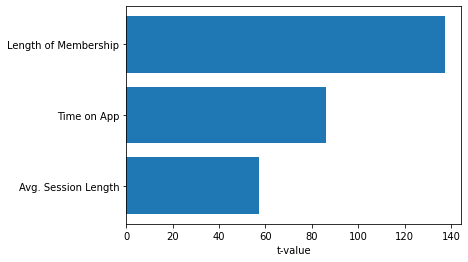

In [13]:
t_val=results.tvalues[1:]
fig, ax = plt.subplots()
ax.barh(t_val.index,t_val)
#ax.set_yticklabels(t_val.index)
ax.set_xlabel("t-value")
plt.show()

The feature most important in the model is _Length of Memebership_, followed by the others.

Some strategies that the company can adopt for improve the yearly amount spent per consumer are:
- try to retain regular customers and attract new customers  with marketing strategies and create stimulus to improve the length of membership ;
- develop innovative functions for the app;
- develop design and contents of website and mobile app that guarantee a gratifying experience can extend the average length of the customer's session.  


### Regression diagnostics
___

In many statistical analysis we are not sure if the statistical model is correctly specified.
Next we will verify if we can hold the assumptions of Linear Regression (Ordinary Least Square) through statistics test and diagnostic plot.

(500,)


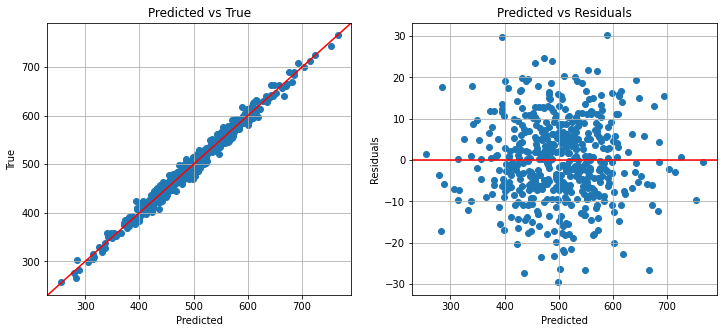

In [14]:
pred=results.predict()
print(pred.shape)
## residuals
residuals = y - pred
## Plot predicted vs true
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 5)
from statsmodels.graphics.api import abline_plot
ax[0].scatter(pred, y)
abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
#ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
ax[0].grid(True)
ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
#ax[0].legend()

## Plot predicted vs residuals
ax[1].grid(True)
ax[1].scatter(pred, residuals)
#ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
#ax[1].hlines(y=0, xmin=np.min(pred), xmax=np.max(pred))
ax[1].axhline(y=0, color='r', linestyle='-')
#ax[1].legend()
plt.show()

The first plot is _Predicted vs True values_; this visualization shows the actual targets against the predicted values generated by the model.
Ideally, in the scatter plots of Predicted vs True all 
 points should be close to a diagonal line. If the model had a high $R^2$, all the points would be close to this diagonal line. Lower is the $R^2$, so weaker is the goodness of fit of the model, more dispersed the points are (away from this diagonal line).
From this scatter plot we can tell other issues related to your model, like if the residuals of the model are heteroskedastic.

The second plot is _Predicted vs Residuals_; this plot shows that the residuals are incorrelated with the predicted values, so we can hold this assumption. 

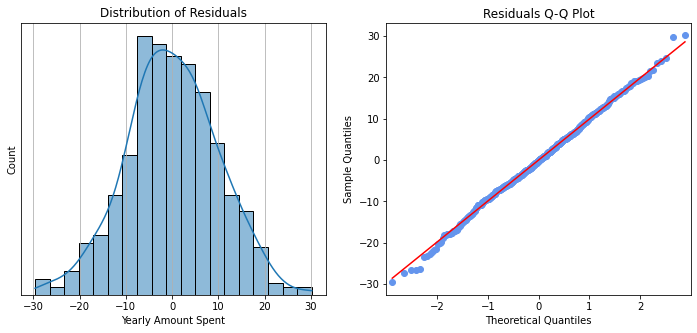

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 5)
#sns.distplot(residuals, color="red", hist=True, kde=True, kde_kws={"shade":True}, ax=ax)
sns.histplot(residuals,  kde=True,  ax=ax[0])
ax[0].grid(True)
ax[0].set(yticks=[], yticklabels=[], title="Distribution of Residuals")
plt.xlabel('')

#Running plot & giving it a title
#stats.probplot(results.resid, dist="norm", plot= plt)
sm.qqplot(results.resid, ax=ax[1], line='s', markeredgecolor='cornflowerblue', markerfacecolor='cornflowerblue')
ax[1].set(title="Residuals Q-Q Plot")
#sm.qqplot(marker='.', markerfacecolor='k', markeredgecolor='c', alpha=0.3)
#sm.qqline(qq.axes[0], line='45', fmt='k--')

plt.show()

Another assumption of the Linear Rgression is that the residuals are normally distribuited.
We can verify this assumption through visualization tool and statistical test.
The first plot is _Distribution of Residuals_. The second plot is _Residuals Q-Q Plot_ and in this the quantiles of the residuals distribution are plotted against the quantiles of the standard normal distributions. Through a Q-Q plot we can verify if the distributions are similar or not.
These 2 plot confim that the residuals are normally distribuited.
We can reinforce this assumption with a statistical test.
The Jarque–Bera test is a normality test for verify if the residuals distribution  match with a standard normal distribution. As follows the result of the test:
$$JB>\chi^{2}_{(\alpha=0.05;2)}\\
0.136 >5.99 $$
We can hold ($p-value=0.93$) $H_0$ hypothesis with a significance at $5\%$ whereby the residuals are normally distribuited.

The next assumption of the Linear regression (OLS) to verify the homoscedasticity. Homoscedasticity means that error have constant variance; holding $X=x$ fixed, $Var(Y)=Var(\epsilon)=\sigma^2$, this means that the variance of the error is constant across various levels of your dependent variable.
The violation of this assumption represent heteroscedasticity.
When heteroscedasticity is present in a regression analysis, the results of the analysis become hard to trust.

One way to determine if heteroscedasticity is present in a regression analysis is to use a Breusch-Pagan Test.


In [16]:
#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 5.789377659489448),
 ('p-value', 0.12231940789733223),
 ('f-value', 1.9367797111196596),
 ('f p-value', 0.12269135292007106)]

$$LM>\chi^{2}_{(\alpha=0.05;p-1)}\\
5.79>7.81$$

 The result of this statistical test is that we can hold the $H_0$ hypothesis:'homoscedasticity is present' with a significance at $5\%$. We do not have sufficient evidence ($p-value=0.12$) to say that heteroscedasticity is present in the regression model. We should use the method of _Weighted Least Squares_  when the ordinary least squares assumption of constant variance in the errors is violated (heteroscedasticity).

The next step is to verify multicollinearity.
Multicollinearity occurs when there are two or more independent variables in a multiple regression model that have a high correlation among themselves; so we may have difficulty in distinguishing between their individual effects on the dependent variable.
Multicollinearity can be detected using the Variance Inflation Factor($VIF$).

$$VIF=\frac{1}{1-R^{2}_{j}}$$

where $R^{2}_{j}$ is the coefficient of determination of the regression that has $X_j$ as a function of all the other explanatory variables (all the other $X$ variables).

As we see from the formula, greater the value of $R^{2}_{j}$, greater is the $VIF$. 
Hence, greater $VIF$ denotes greater correlation. 
- $VIF$ starts at 1 and has no upper limit.
- $VIF = 1$ denotes no correlation between the independent variable and the other variables.
- $VIF$ exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others.

In [17]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
calc_vif(X_statsmodel)

,variables,VIF
0,const,1284.204023
1,Avg. Session Length,1.004526
2,Time on App,1.001731
3,Length of Membership,1.004601


We can see that all predictors have a low value of VIF; it means that they can be used all in the model and there isn't multicollinearity.

The next step in regression diagnostic is to verify the presence of outliers,
high-leverage points, and influential observations.

High leverage points are observations with unusual combination of explanatory variables or an unusual $X-value$. It’s an outlier in the predictor space, because the dependent variable $Y$ value isn’t used to calculate an observation’s leverage. We have a high-leverage points if $h_{i}>>\hat{h}=\frac{p+1}{n}$ . 
Rule of thumb (Steven’s): the $h_{i}$ value is considered large if is 3 times the mean value $\hat{h}$ .

In [18]:
print('Mean value hat:',(4/500)*3)

infl = results.get_influence()
inf_sum = infl.summary_frame()

###
#high leverage points
print(inf_sum['hat_diag'].sort_values(ascending=False).head(8))

Mean value hat: 0.024
309    0.034797
12     0.031260
396    0.031239
65     0.030797
442    0.030101
157    0.028778
18     0.026093
447    0.024110
Name: hat_diag, dtype: float64


We can notice that we have 7 high leverage points because $h_{i}>>\hat{h}=0.008$, so 3 times $\hat{h}$.

An outlier is an observation that isn’t predicted well by the fitted regression
model (that is, has a large positive or negative residual). We can identify an outlier comparing the absolute value of studentized residual with threshold value $|3|$. Studentized residuals are distributed according to $t$ distribution and the probability of being greater than the threshold is less than 1%.

In [19]:
#outliers
print(inf_sum['student_resid'].sort_values(ascending=False).head(2))
print(inf_sum[inf_sum['student_resid']<-2.9])

460    3.064356
148    3.025740
Name: student_resid, dtype: float64
     dfb_const  dfb_Avg. Session Length  ...  student_resid    dffits
472   0.082893                -0.087321  ...       -2.99958 -0.171459

[1 rows x 10 columns]


We can notice that are present in the model 2 outliers.
In the next plot we can visualize graphically high leverage points and outliers. 

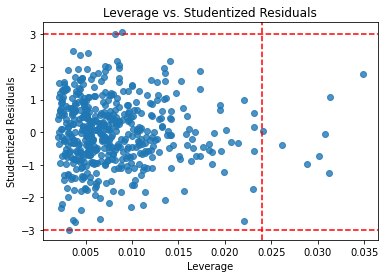

In [20]:
fig.set_size_inches(12, 5)
sns.regplot(x='hat_diag', y='student_resid', data=inf_sum,  fit_reg=False)
plt.title('Leverage vs. Studentized Residuals')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')
plt.axhline(y=+3, color='r', linestyle='--')
plt.axhline(y=-3, color='r', linestyle='--')
plt.axvline(x=0.024, color='r', linestyle='--')
plt.show()

Next influential observation.
An influential observation is an observation that has a disproportionate impact on
the determination of the model parameters. The combination of high leverage with a regression outlier (high studentized residual) therefore produces substantial influence on the regression coefficients.
Influential observations are identified using the Cook’s distance, or Cook’s D.

If $D{i}>\frac{4}{n-p-1}$, where $n$ is the sample size and $p$ is the number of predictor variables, it indicates influential observations.

In [21]:
#influential obervations
print(inf_sum['cooks_d'].sort_values(ascending=False).head())
print("D >> theshold=",4/(500-3-1))

260    0.041190
309    0.028995
460    0.020835
148    0.018512
303    0.017851
Name: cooks_d, dtype: float64
D >> theshold= 0.008064516129032258


We can visualize a Cook’s D plotwith the
following code:

In [22]:
#This is the code but doesn't work in google colab

#!pip install yellowbrick
#from yellowbrick.regressor import CooksDistance
#visualizer = CooksDistance()
#visualizer.fit(X, y)
#visualizer.show()

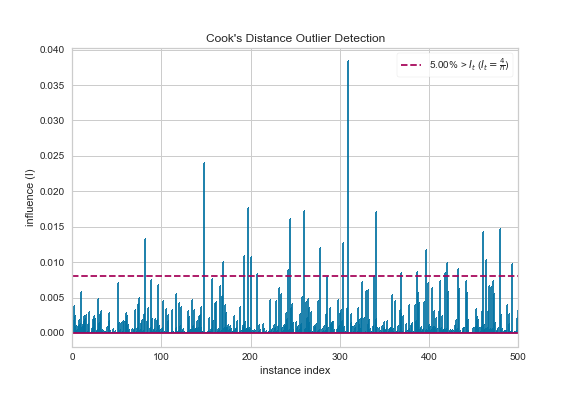



It's evident that many observations are influent because $D_{i}>0.08$.
The efficiency of least-squares regression is seriously impaired by the presence of outliers and high-leverage observations.
There are 2 possible responses for this problem:
- if unusual data are discovered, these can be corrected or removed.
- use a Robust regression.

Robust estimation is an alternative approach to this kind of problem. Properly formulated, robust estimators are almost as efficient as least squares  and hold their efficiency well because they are resistant to outliers. Rather than simply discarding discrepant data, however, robust estimation down-weights them.

A common robust regression method is called M-estimation. M-estimators attempt to minimize the sum of a chosen function $\rho(.)$ which is acting on the residuals. 
The general M-estimator minimizes the objective function:
$$\min\limits_{\beta} \sum_{i=1}^{n} \rho\bigg(\frac{\epsilon_i}{\tau}\bigg)^2=
\min\limits_{\beta} \sum_{i=1}^{n} \rho\bigg(\frac{y_i-x_{i} \beta}{\tau}\bigg)^2$$
where $\tau$ is a measure of the scale.
One of the most common function chosen in M-estimation is the Huber's method.
Calculation of M-estimators usually requires an iterative procedure.
A numerical method called _Iteratively Reweighted Least Squares_ (IRLS) is used to estimate iteratively the weighted least squares estimates until a stopping criterion is met.
Carroll and Rupert (Robust Estimation in Heteroscedastic Linear Models, 1982) have shown for the heteroscedastic linear models that M-estimators are suitable. 
Now we can see the results of robust regression with Huber's method.



In [23]:
rlm_model = rlm((y, X_statsmodel), df).fit()
print(rlm_model.summary())
pred_rlm=rlm_model.predict()
#print(pred_rlm[:6])
#print(y[:6])
print('Mean Absolute Error:', mae(y, pred_rlm
))
print('Mean Squared Error:',mse(y,pred_rlm
))
print('Root Mean Squared Error:', np.sqrt(mse(y,pred_rlm
)))
print('R^2:', r2(y, pred_rlm
))
print('Adjusted R^2:', 1-(1-r2(y, pred))*(500-1)/(500-3-1))

                     Robust linear Model Regression Results                    
Dep. Variable:     Yearly Amount Spent   No. Observations:                  500
Model:                             RLM   Df Residuals:                      496
Method:                           IRLS   Df Model:                            3
Norm:                           HuberT                                         
Scale Est.:                        mad                                         
Cov Type:                           H1                                         
Date:                 Sun, 14 Mar 2021                                         
Time:                         20:58:33                                         
No. Iterations:                     11                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -

The robust regression produce similar results to linear regression with a little larger coefficients.
The metrics used to evaluate the robust regression are similar to the metrics in OLS.
In the M-estimation the RMSE, so the error that model makes in prediction, is equal to $9.93$ and so equal RMSE obtained in the OLS.


### Machine learning approach for predictions
___
The aim of _Machine learning_ is to make an accurate prediction.

Machine learning use tools that take the current information, sift through data looking for patterns that are relevant for the problem and return answers. 
The machine learning is evolved
in a large number of fields such as chemistry, computer science, physics,
and statistics.

Before fitting the model, we need to split the entire data in two sets: the training set and the
test set. The training set is used to train model, instead
the test it used for test model. This method tells you
how well your model will perform on instances it has never seen before.
The error rate on new cases is called the
generalization error (aka test error) and we get an estimate of this error by evaluating the model on the test set.

#### The bias-variance tradeoff
A model has a low _bias_ if it predicts well the labels of the training data. If the model makes many mistakes on the training data, the model has a high _bias_ or underfits. So, _underfitting_ is the inability of the model to predict well the labels of the data it was trained on.
The _high bias_, and so _underfiting_, is due to wrong assumptions,
such as assuming that the data is linear when it is actually quadratic.
The solution to the problem of _underfitting_ is to try a more complex model or to engineer
features with higher predictive power.

_Overfitting_ is another problem for a model.  When a model overfits, it predicts very
well the training data but poorly the test data, so low training error but high testing error.
The problem of overfitting is also called the problem of
high _variance_, becaues the model is too sensitive to small variations in the training set and fails to generalize the test set.
Several reasons can lead to _overfitting_:
- model is too complex for the data;
- you have too many features but a small number of training examples.

Some solutions for the overfitting are:
- Try a simpler model;
- Dimensionality reduction.
- If possible add more training data.
- Regularization.

Now we fit  Linear model with  `scikit-learn`.

In [24]:
X=df[['Avg. Session Length','Time on App', 'Time on Website','Length of Membership']]
y=df['Yearly Amount Spent']
X=X.drop(columns=['Time on Website'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
pred_lm=lm.predict(X_test)
pred_lm_train=lm.predict(X_train)

from sklearn import metrics
def print_evaluate_lm(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    adj_r2 = (1 - (1 - r2_square) * ((X_test.shape[0] - 1) / 
          (X_test.shape[0] - X_test.shape[1] - 1)))
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
print_evaluate_lm(y_train, pred_lm_train)

print_evaluate_lm(y_test,pred_lm)

MAE: 7.673143486412727
MSE: 96.65526990189073
RMSE: 9.83134120564894
MAE: 8.431160212620167
MSE: 103.97458501427755
RMSE: 10.196792878855467


The _model trained_ don't present any problems of low bias (_underfitting_) or high variance (_overfitting_).
One disadvantage of using train-test-split for model validation is that we have lost a
portion of data to the model training. Statistical methods tend to perform worse when trained on fewer observations, this suggests that the
test set error may tend to _overestimate_ the test error rate
for the model. The estimate of the test error can be highly variable depending on precisely which observations are included in the training set and which
observations are included in the test set.

Cross-validation is a statistical method to evaluate generalization performance in a
more stable way than using a split into training and test set.
In cross-validation, instead of splitting the data set in to a training set and a test set,
the data is splitted repeatedly and multiple models are trained.
The most commonly used version of cross-validation is $k-fold$ cross-validation, where
$k$ is a user specified number, usually five or ten. The data is first partitioned into $k$ parts of (approximately) equal size, called folds, and each subset of the data is used both as a training set and as a test set.

In [25]:
from sklearn.model_selection import cross_val_score, cross_validate
cv_results_lm = cross_validate(lm, X, y, cv=5, scoring=['neg_mean_squared_error','neg_mean_absolute_error'], return_train_score=True)
print(cv_results_lm.keys())

print('MSE test',str(-1*np.mean(cv_results_lm['test_neg_mean_squared_error'])), 
      'RMSE test',str(np.sqrt(-1*np.mean(cv_results_lm['test_neg_mean_squared_error']))),
      'MAE test',(-1*np.mean(cv_results_lm['test_neg_mean_absolute_error'])))


dict_keys(['fit_time', 'score_time', 'test_neg_mean_squared_error', 'train_neg_mean_squared_error', 'test_neg_mean_absolute_error', 'train_neg_mean_absolute_error'])
MSE test 100.45913329317136 RMSE test 10.022930374554708 MAE test 7.948495370183828


We can see train_test_split method overestimates the MSE ($103$) respect to 5-fold cross-validation (100). 

In machine learning the aim is to do accurate predictions, but linear models are often not good regarding predictive performance because the relationships that can be learned are so restricted and usually oversimplify how complex reality is.

## Regularization

Linear models can conduct to overfitting because estimate large coefficient that have high variance, so they do not generalize well to unseen data.

For the principle of 'parsimony' in model building a simpler model with fewer variables is always preferred to a more complex model with too many features.
For penalizing large coefficients and reduce their variance we will use the regularization.
Controlling (or regularizing) the parameter estimates can be
accomplished by adding a penalty to the SSE if the estimates become large.
Ridge regression adds a penalty on the sum of the squared regression parameters:
$$SSE_{L_{2}}=\min_{\beta}\sum_{i=1}^{n} (y_i - x_i \beta)^2 + \alpha \sum_{j=1}^{p} \beta_{j}^2 $$

In effect, this method shrinks the estimates towards 0 as the $\alpha$ penalty
becomes large (“shrinkage methods”).
By adding the penalty $\alpha$, we are making a trade-off between the model variance and bias. By sacrificing some bias, we can often reduce the variance
enough to make the overall MSE lower than unbiased models.


In the  Ridge regularization (L2) and in the next steps we will use _GridSearchCV_ to found exhaustly the best hyperparameters for every model. In the regularized regression the hyperparameter to optimize for better prediction is $\alpha$. $\alpha$ controls the model complexity:
- $\alpha = 0$ return the OLS;
- very high $\alpha$  can lead to underfitting. 

$\alpha$ is a hyperarameter that we choose before to train a model but we don't know effectively what is the better value of this. _GridSearchCV_ train all the possible model with all the possible combinations of hyperparameters specified in the dictionary _param_grid_.

In the Regularized regression is necessary to normalize the data before to train the model.

In [39]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV

#from sklearn.metrics import make_scorer
#mse_scor = make_scorer(mse, greater_is_better=False)

ridge = Ridge(normalize=True)
param_grid = {'alpha': [0.001, 0.01, 0.1, 1]}
grid_ridge = GridSearchCV(ridge, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
%time grid_ridge.fit(X, y)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_ridge.best_estimator_)
print("\n The best score across ALL searched params:\n",-1*(grid_ridge.best_score_))
print("\n The best parameters across ALL searched params:\n",grid_ridge.best_params_)

cv_results_ridge = cross_validate(Ridge(alpha=0.001,normalize=True), X, y, cv=5, scoring=['neg_mean_squared_error','neg_mean_absolute_error'], return_train_score=True)

print('MSE test',str(-1*np.mean(cv_results_ridge['test_neg_mean_squared_error'])), 
      'RMSE test',str(np.sqrt(-1*np.mean(cv_results_ridge['test_neg_mean_squared_error']))),
      'MAE test',(-1*np.mean(cv_results_ridge['test_neg_mean_absolute_error'])))

CPU times: user 47.6 ms, sys: 1.86 ms, total: 49.4 ms
Wall time: 88.2 ms
 Results from Grid Search 

 The best estimator across ALL searched params:
 Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

 The best score across ALL searched params:
 100.4625163581654

 The best parameters across ALL searched params:
 {'alpha': 0.001}
MSE test 100.4625163581654 RMSE test 10.023099139396228 MAE test 7.946715973711106


Then Ridge regularization (L2), we will train a linear model with Lasso (Least Absolute Shrinkage
and Selection Operator) regularization (L1).
Lasso regularization can be used to select important features of a dataset because it shrinks the coefficients of less important features to exactly 0.
Thus the Lasso yields models that simultaneously use regularization to improve the model and to conduct feature
selection.

$$SSE_{L_{1}}=\min_{\beta}\sum_{i=1}^{n} (y_i - x_i \beta)^2 + \alpha \sum_{j=1}^{p} |\beta_{j}| $$


In [27]:
from sklearn.linear_model import Lasso

lasso = Lasso(normalize=True)
param_grid = {'alpha': [0.001, 0.01, 0.1, 1]}
grid_lasso = GridSearchCV(lasso, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
%time grid_lasso.fit(X, y)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_lasso.best_estimator_)
print("\n The best score across ALL searched params:\n",-1*(grid_lasso.best_score_))
print("\n The best parameters across ALL searched params:\n",grid_lasso.best_params_)


cv_results_lasso = cross_validate(Lasso(alpha=0.001,normalize=True), X, y, cv=5, scoring=['neg_mean_squared_error','neg_mean_absolute_error'], return_train_score=True)
print('MSE test',str(-1*np.mean(cv_results_lasso['test_neg_mean_squared_error'])), 
      'RMSE test',str(np.sqrt(-1*np.mean(cv_results_lasso['test_neg_mean_squared_error']))),
      'MAE test',(-1*np.mean(cv_results_lasso['test_neg_mean_absolute_error'])))

CPU times: user 46.7 ms, sys: 3.84 ms, total: 50.5 ms
Wall time: 87.3 ms
 Results from Grid Search 

 The best estimator across ALL searched params:
 Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

 The best score across ALL searched params:
 100.4588894973161

 The best parameters across ALL searched params:
 {'alpha': 0.001}
MSE test 100.4588894973161 RMSE test 10.022918212642269 MAE test 7.947539566783047


The last regularization is Elastic Net.
ElasticNet is a linear regression model trained with both regularization for the coefficients.
This model combines the two types of penalties.
In Elastic Net we control the combination of L1 and L2 regularization  using the $\lambda_{1-ratio}$ defined as $\rho$ parameter.
In particular, we can define $\rho$ as the ElasticNet mixing parameter:
- for $\rho$ = 0 the penalty is an L2 penalty;
- for $\rho$ = 1 it is an L1 penalty;
- for 0 < $\rho$ < 1, the penalty is a combination of L1 and L2.

In `scikit-learn` $\rho=0.5$ as default value. 
Elastic-net is useful when there are multiple features which are correlated with one another beacuse Lasso is likely to pick one of these at random.
The elastic net solves the following problem:

$$SSE_{Enet}= \min_{\beta} \frac{1}{2n} \sum_{i=1}^{n} (y_i - x_i \beta)^2 + \alpha \sum_{j=1}^{p} \biggl[\frac{1}{2}(1-\rho)\beta_{j}^2+\rho |\beta_{j}|\biggl] $$

The parameters $\alpha$ is constant that multiplies the penalty terms. 

In [28]:
from sklearn.linear_model import ElasticNet

el_net = ElasticNet(l1_ratio=0.5, normalize=True)
param_grid = {'alpha': [0.0001,0.001, 0.01, 0.1,0.3, 0.5, 0.7 ,1,2]}
grid_el_net = GridSearchCV(el_net, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
%time grid_el_net.fit(X, y)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_el_net.best_estimator_)
print("\n The best score across ALL searched params:\n",-1*(grid_el_net.best_score_))
print("\n The best parameters across ALL searched params:\n",grid_el_net.best_params_)

pred_el_net = cross_val_predict(ElasticNet(l1_ratio=0.5, normalize=True, alpha=0.0001), X, y, cv=5, n_jobs=-1)

cv_results_el_net = cross_validate(ElasticNet(l1_ratio=0.5, normalize=True, alpha=0.0001), X, y, cv=5, scoring=['neg_mean_squared_error','neg_mean_absolute_error'], return_train_score=True)
print('MSE test',str(-1*np.mean(cv_results_el_net['test_neg_mean_squared_error'])), 
      'RMSE test',str(np.sqrt(-1*np.mean(cv_results_el_net['test_neg_mean_squared_error']))),
      'MAE test',(-1*np.mean(cv_results_el_net['test_neg_mean_absolute_error'])))

CPU times: user 87.7 ms, sys: 379 µs, total: 88.1 ms
Wall time: 177 ms
 Results from Grid Search 

 The best estimator across ALL searched params:
 ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

 The best score across ALL searched params:
 102.62995696670191

 The best parameters across ALL searched params:
 {'alpha': 0.0001}
MSE test 102.62995696670191 RMSE test 10.130644449722926 MAE test 8.031676267985857


Linear regression models can only detect linear relationships between output variable and input variables. Nonlinear relationships and interactions must be specified explicitly as an input feature in the model.
In machine learning linear models are often not the best choice for predictive performance, because the relationships learned by the linear model usually oversimplify the reality.

Linear models in statistical learning represent a parametric approach, because imply a probability distributions of the population on the basis of a sets of parameters.
In Non-Parametric methods, there is no assumption of parameters for the given population and the methods don’t depend on the distribution of the population.  

For this reason we introduce two non parametric approach: K Nearest Neighbor (KNN) and Support Vector Machine (SVM).
Distance based algorithms like KNN and SVM are most affected by the range of features and for this reason we need to standardize the features.

## KNN
KNN algorithm can be used for classification and regression problems.
KNN cannot be cleanly summarized by a model as linear regression, its construction is solely based on the individual samples from the training data. 
 The KNN algorithm uses ‘feature similarity’ to predict the values of any new data points.
First, the distance between the new point and each training point is calculated.The closest k data points are selected (based on the distance).
The average of these data points is the final prediction for the new point.
Other summary statistics, such as the median, can also be used in place of the mean to predict the new sample.
The distance between a new point and each training points is calculated through various methods which the most commonly known methods are Euclidian, Manhattan and Minkowski.
The Minkowski distance is a generalization of Euclidean distance and is defined as follow:
$$d_{(a,b)}\biggl(\sum_{j=1}^{p} |x_{aj}-x_{bj}|^q  \biggl)^{\frac{1}{q}}$$
where $x_a$ and $x_b$ are two individual samples and $q > 0$. When $q = 2$,  Minkowski
distance is the Euclidean distance. When $q = 1$, Minkowski distance is equivalent to Manhattan (or city-block) distance, which is a common
metric used for samples with binary predictors. Many other distance metrics exist, such as Tanimoto, Hamming, and cosine, and are more appropriate
for specific types of predictors and in specific scientific contexts. Tanimoto
distance, for example, is regularly used in computational chemistry problems.

In [34]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = X.columns
# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import make_scorer
mse_scor = make_scorer(mse, greater_is_better=False)

knn = KNeighborsRegressor()
param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10], 'metric':['euclidean','minkowski']}
grid_knn = GridSearchCV(knn, param_grid, cv=5,  n_jobs=-1, scoring=mse_scor)
%time grid_knn.fit(X, y)

print("\n The best score across ALL searched params:\n",-1*(grid_knn.best_score_))
print("\n The best parameters across ALL searched params:\n",grid_knn.best_estimator_)

cv_results_knn = cross_validate(KNeighborsRegressor(n_neighbors=3), X, y, cv=5, scoring=['neg_mean_squared_error','neg_mean_absolute_error'], return_train_score=True)
print('MSE test',str(-1*np.mean(cv_results_knn['test_neg_mean_squared_error'])), 
      'RMSE test',str(np.sqrt(-1*np.mean(cv_results_knn['test_neg_mean_squared_error']))),
      'MAE test',(-1*np.mean(cv_results_knn['test_neg_mean_absolute_error'])))

CPU times: user 149 ms, sys: 4.4 ms, total: 154 ms
Wall time: 397 ms

 The best score across ALL searched params:
 356.77536578447877

 The best parameters across ALL searched params:
 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')
MSE test 356.77536578447877 RMSE test 18.88849824058225 MAE test 14.08249798366253


###Support Vector Regression
Then KNN, we will test the predictive performance of Support Vector Machines (SVM).
The approach of SVM is popularly and widely used for classification (SVC) problems in machine learning, but SVM can be used also in regression problems (SVR).
This technique is in the framework of robust regression where we
seek to minimize the effect of outliers on the regression equations.
SVMs for regression use a function similar to the Huber function. Given a threshold set by the user (denoted as $\epsilon >0$), data points with residuals within the threshold do not contribute to the
regression fit while data points with an absolute difference greater than the
threshold contribute a linear-scale amount.
This corresponds to dealing with the
$\epsilon$-insensitive loss function $|\zeta|_\epsilon$ described by:
$$|\zeta|_\epsilon= 0 \,\, if\,\, |\zeta|\leq\epsilon\\
|\zeta|_\epsilon= |\zeta|-\epsilon \,\, if\,\, |\zeta|>\epsilon .$$
This is somewhat counterintuitive: the poorly predicted points define the line. 
Support Vector Regression is also known $\epsilon$-insensitive regression in Hard Margin SVM.
Given training vectors $x_i \in R^p$ and $y_i \in R^n$, $i=1,2,\dots,n$, the goal of SVR is to find a function $f(x)$ that has at
most $\epsilon$ deviation from the actually obtained targets $y_i$ for all
the training data and at the same time that is flat as possible.
$$f(x)=w^t x+b$$
This may be important if we want to be sure to not lose more
than $\epsilon$ money when dealing with total amount spent, for instance.


To find the best $w$ and $b$, SVR solves an optimization problem through optimizing function under constraints.

$$\min\limits_{w,b,\zeta} \frac{1}{2}\|w\|^2 + C \sum_{1=1}^{n} (\zeta_i+\zeta_{i}^*) \\
 subject\,\, to:\,\,\,\,
  y_i- {w^{t}\phi(x_i)}-b\leq \epsilon+\zeta_i\\
   {w^{t}\phi(x_i)}+b-y_i\leq \epsilon+\zeta_{i}^*\\
 \,\,\zeta_i,\zeta_{i}^*\geq 0$$

The hyperparameter $C > 0$ is set by user and penalizes large residuals.

The Soft Margin SVM adds slack variables $\zeta_i$ and $\zeta^*$ to the constraints of the optimization problem because we want to allow some errors.

In most cases the optimization problem can be solved more
easily in its dual formulation using Lagrange multipliers that provides the key for extending SVM to nonlinear functions with kernel function.
In this formulation training vectors are implicitly mapped into a higher dimensional space by the function $\phi$ (map function $\Phi: R^2 \rightarrow R^3$).

The simplest example of a kernel function is obtained by considering the identity mapping for the feature space: given $\phi(x) = x$,  $k(x_i, x_j
) =x_i \cdot x_j$ that is just the normal dot product and we shall refer to this as the linear kernel.

The predictions for a new input feature vector $x$ is given by the follow function:
$$y(x) = \sum_{1=1}^{n} (\alpha_{i}-\alpha_{i}^*) \,K (x_i,x) + b$$
where  $0\leqα_i, α_{i}^* \leq C$ are Lagrange mulitipliers.

 $\alpha$ is sparse vector because we don’t care
about errors which are smaller than $\epsilon$. The $x_i$ for which $\alpha_i > 0$ are called the _support vectors_;
these are points for which the errors lie on or outside the $\epsilon$ tube.
Note that the individual training set data points $x_i$ are required for new predictions.
However, there are other types of kernel functions that can be used to generalize the regression model and encompass nonlinear functions of the predictors for example
radial basis function. These kind of non linear kernel functions have extra hyperparameters: for example $\gamma$ in  _radial basis function_ (rbf).
$$K(x_i,x_j)\,= exp(-\gamma\,\|x_i-x_j\|^2)$$

The cost hyperparameter $C$, along with the others hyperparameters like $\gamma$ for rbf, constitute the tuning hyperparameters for
the model.
The hyperparameter $C$ is analogous to the inverse of a regularization coefficient because it controls
the trade-off between minimizing errors and controlling model complexity.
When the $C$ is large, the model becomes very flexible since the effect of errors is amplified ($\epsilon$ tube smaller). When the cost is small, the model become less likely to over-fit but more likely to underfit ($\epsilon$ tube smaller).
Instead $\gamma$ in rbf kernel defines that controls the scale, how much influence have a single training example has.


In [30]:
from sklearn.svm import SVR
svr = SVR()

param_grid = [{'kernel': ['rbf'], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                     'C': [1, 10, 100, 1000]},
                   {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
#param_grid_2= {'kernel': ['poly'], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
 #                    'C': [1, 10, 100, 1000], 'degree' : [1,2,3]}

#param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}
grid_svr = GridSearchCV(svr, param_grid, cv=5,  n_jobs=-1, scoring=mse_scor)
%time grid_svr.fit(X, y)
print("\n The best score across ALL searched params:\n",-1*(grid_svr.best_score_))
print("\n The best parameters across ALL searched params:\n",grid_svr.best_params_)

cv_results_svr = cross_validate(SVR(C=10, kernel='linear'), X, y, cv=5, scoring=['neg_mean_squared_error','neg_mean_absolute_error'], return_train_score=True)
print('MSE test',str(-1*np.mean(cv_results_svr['test_neg_mean_squared_error'])), 
      'RMSE test',str(np.sqrt(-1*np.mean(cv_results_svr['test_neg_mean_squared_error']))),
      'MAE test',(-1*np.mean(cv_results_svr['test_neg_mean_absolute_error'])))

CPU times: user 203 ms, sys: 6.79 ms, total: 210 ms
Wall time: 4.86 s

 The best score across ALL searched params:
 -6296.279645212622

 The best parameters across ALL searched params:
 {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
MSE test 99.77428831054888 RMSE test 9.988708040109536 MAE test 7.9416538194762705


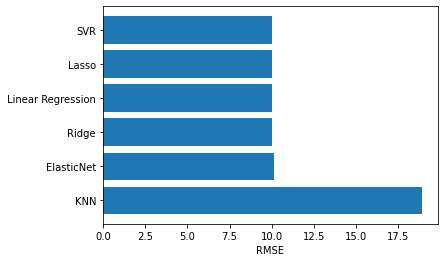

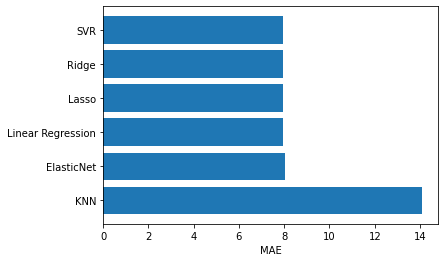

In [31]:
d = [['Linear Regression',np.sqrt(-1*np.mean(cv_results_lm['test_neg_mean_squared_error'])),-1*np.mean(cv_results_lm['test_neg_mean_absolute_error'])],
    ['Ridge',np.sqrt(-1*np.mean(cv_results_ridge['test_neg_mean_squared_error'])),-1*np.mean(cv_results_ridge['test_neg_mean_absolute_error'])],
    ['Lasso',np.sqrt(-1*np.mean(cv_results_lasso['test_neg_mean_squared_error'])),-1*np.mean(cv_results_lasso['test_neg_mean_absolute_error'])],
    ['ElasticNet',np.sqrt(-1*np.mean(cv_results_el_net['test_neg_mean_squared_error'])),-1*np.mean(cv_results_el_net['test_neg_mean_absolute_error'])],
    ['KNN',np.sqrt(-1*np.mean(cv_results_knn['test_neg_mean_squared_error'])),-1*np.mean(cv_results_knn['test_neg_mean_absolute_error'])],
    ['SVR',np.sqrt(-1*np.mean(cv_results_svr['test_neg_mean_squared_error'])),-1*np.mean(cv_results_svr['test_neg_mean_absolute_error'])]]

data_metrics = pd.DataFrame(data=d, columns=['Model', 'RMSE','MAE'])
data_metrics_rmse=data_metrics.sort_values(by=['RMSE'],ascending=False)

fig, ax = plt.subplots()
ax.barh(data_metrics_rmse['Model'],data_metrics_rmse['RMSE'])
#ax.set_yticklabels(data_metrics.index)
ax.set_xlabel("RMSE")
plt.show()

data_metrics_mae=data_metrics.sort_values(by=['MAE'],ascending=False)
fig, ax = plt.subplots()
ax.barh(data_metrics_mae['Model'],data_metrics_mae['MAE'])
#ax.set_yticklabels(data_metrics.index)
ax.set_xlabel("MAE")
plt.show()

The second aim of this project is to train and choose a model that give us the better perfomance to predict the yearly amount spent per consumer.
 As we can see from the 2 showed plot about the two considere evaluation metrics (RMSE and MAE), the Support Vector Regression performs a little better than the other models.
The worst model in terms of predictive performance is the KNN Regression with the lowest values for both metrics. 
Since in this case the predictive performance of SVR is more similar to Lasso regression and Linear regression, we can also choose a simpler model that ensures the same great predictive performance.



____

##References

https://christophm.github.io/interpretable-ml-book/limo.html

https://www.statsmodels.org/stable/examples/notebooks/generated/robust_models_1.html#examples-notebooks-generated-robust-models-1--page-root

Robust Regression, Appendix to An R and S-PLUS Companion to Applied Regression, John Fox, 2002


Applied Predictive Modeling, M.Kuhn and K.Johnson, 2013

Hands-On Machine Learning with Scikit-Learn, Keras, and
TensorFlow, SECOND EDITION, Aurélien Géron, 2019

Machine learning with Python, Andreas C. Mueller and Sarah Guido, 2016

Andriy Burkov, The Hundred-Page Machine Learning Book, 2019

Christopher M. Bishop,
Pattern Recognition and
Machine Learning, 2006

https://bradleyboehmke.github.io/HOML/knn.html

https://medium.com/@ankitnitjsr13/math-behind-svm-kernel-trick-5a82aa04ab04


https://shuzhanfan.github.io/2018/05/understanding-mathematics-behind-support-vector-machines/ 

LIBSVM: A Library for Support Vector Machines,
Chih-Chung Chang and Chih-Jen Lin, 2021

A Tutorial on Support Vector Regression,
Alex J. Smola and Bernhard Scholkopf, 2003

Machine Learning,
A Probabilistic Perspective,
Kevin P. Murphy

https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

A study on robust regression estimators in
heteroscedastic error models,
Nayeong Son
and Mijeong Kim, 2017

Gareth James, Daniela Witten, Trevor Hastie,
Robert Tibshirani,
An Introduction to
Statistical Learning
with Applications in R

Trevor Hastie,
Robert Tibshirani,
Jerome Friedman,
The Elements of
Statistical Learning:
Data Mining, Inference, and Prediction

https://stackoverflow.com/questions/48244219/is-sklearn-metrics-mean-squared-error-the-larger-the-better-negated/48246255

https://stats.stackexchange.com/questions/463554/how-do-i-interpret-mean-absolute-error-mae-or-mean-absolute-percentage-error

https://machinelearningmastery.com/

https://www.statsmodels.org/stable/user-guide.html

https://www.kdnuggets.com/

https://scikit-learn.org/stable/user_guide.html

https://towardsdatascience.com/